<a href="https://colab.research.google.com/github/jameshuanghuang/Some-Assignment-in-Colab/blob/main/VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [5]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [6]:
tickers = ['AAPL', 'C', 'DIS', 'FB']
tickers = ['AAPL', 'C', 'DIS', 'FB', 'AMD', 'T', 'MCD', 'BAC', 'NFLX', 'INTC', 'UAL']

# We would like all available data from 01/01/2014 until 12/31/2016.
start_date = "2014-01-01"
end_date = "2020-12-31"
df = yf.download(tickers, start=start_date, end=end_date, group_by="ticker")

[*********************100%***********************]  11 of 11 completed


In [7]:
# df.head(10)
df.loc[:, (slice(None), "Close")].head(3)

,NFLX,DIS,AAPL,C,INTC,FB,UAL,MCD,AMD,BAC,T
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,
2014-01-02,51.831429,76.269997,19.754642,52.270000,25.790001,54.709999,37.730000,96.410004,3.95,16.10,34.950001
2014-01-03,51.871429,76.110001,19.320715,53.400002,25.780001,54.560001,39.950001,96.540001,4.00,16.41,34.799999
2014-01-06,51.367142,75.820000,19.426071,53.810001,25.459999,57.200001,39.360001,95.849998,4.13,16.66,34.959999


In [8]:
ClosePrice = df.loc[:, (slice(None), "Close")]
data = np.log(ClosePrice) - np.log(ClosePrice.shift(1))
covMatrix = np.cov(data.dropna().transpose())
corMatrix = np.corrcoef(data.dropna().transpose())
# print(data, "\n")
# print(covMatrix, "\n")
print(corMatrix, "\n")

[[1.         0.2351989  0.38803399 0.27682608 0.34918057 0.43700497
  0.16317675 0.20892577 0.29143242 0.25858681 0.16433057]
 [0.2351989  1.         0.43097036 0.59829263 0.42642134 0.37891615
  0.4666897  0.47529653 0.2560038  0.57718649 0.4802611 ]
 [0.38803399 0.43097036 1.         0.47243789 0.52332481 0.53199476
  0.28230004 0.41663864 0.36209938 0.45205587 0.35371608]
 [0.27682608 0.59829263 0.47243789 1.         0.49353115 0.39674482
  0.57492724 0.5248287  0.30035825 0.89122515 0.50717142]
 [0.34918057 0.42642134 0.52332481 0.49353115 1.         0.42138111
  0.32979074 0.38308066 0.336562   0.48129078 0.40233842]
 [0.43700497 0.37891615 0.53199476 0.39674482 0.42138111 1.
  0.26800995 0.38086016 0.29112733 0.39340968 0.24783312]
 [0.16317675 0.4666897  0.28230004 0.57492724 0.32979074 0.26800995
  1.         0.36933415 0.16391396 0.51635168 0.31667516]
 [0.20892577 0.47529653 0.41663864 0.5248287  0.38308066 0.38086016
  0.36933415 1.         0.22957993 0.47043648 0.40105727]


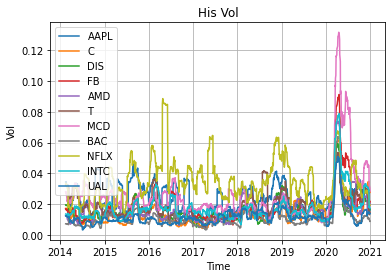

In [9]:
#use 30 days to calculate vol
window = 30
vol = data.rolling(window).apply(np.std).dropna()

fig, ax = plt.subplots()
ax.plot(vol)
ax.set(xlabel='Time', ylabel='Vol', title='His Vol')
ax.grid()
ax.legend(tickers)
plt.show()

               AAPL         C       DIS  ...      NFLX      INTC       UAL
0    AAPL       NaN       NaN       NaN  ...       NaN       NaN       NaN
     C          NaN       NaN       NaN  ...       NaN       NaN       NaN
     DIS        NaN       NaN       NaN  ...       NaN       NaN       NaN
     FB         NaN       NaN       NaN  ...       NaN       NaN       NaN
     AMD        NaN       NaN       NaN  ...       NaN       NaN       NaN
...             ...       ...       ...  ...       ...       ...       ...
1760 MCD  -0.000061  0.000155  0.000068  ...  0.000003  0.000282  0.000099
     BAC   0.000004  0.000016  0.000010  ...  0.000025  0.000009  0.000002
     NFLX  0.000097 -0.000026  0.000102  ...  0.000385 -0.000081 -0.000092
     INTC -0.000034  0.000052  0.000037  ... -0.000081  0.000309  0.000064
     UAL  -0.000081  0.000141 -0.000055  ... -0.000092  0.000064  0.000194

[19371 rows x 11 columns]


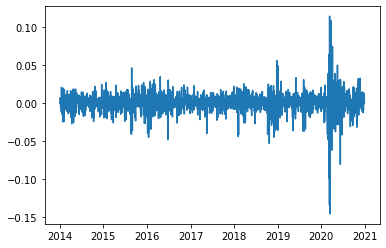

In [10]:
weights = [1]*len(tickers)
tol = sum(weights)
weights = [w/tol for w in weights]
# correlation not cosidered
portfolioVol = np.sum(weights*vol, axis=1)
# correlation considered
temp = pd.DataFrame(data.dropna().values, columns=tickers)
rollingCov = temp.rolling(window=window).cov()
print(rollingCov)
# portfolio return
portfolioReturn = np.sum(weights*data, axis=1)
plt.plot(portfolioReturn)
# plt.hist([portfolioReturn.values])

In [11]:
Ids = rollingCov.index.unique(0)
volwRollingCov = [np.matmul(np.matmul(weights,rollingCov.loc[i].values), np.transpose(weights)) 
                  for i in Ids
                 ]
volwRollingCov = np.sqrt(volwRollingCov)
assert len(volwRollingCov) == len(Ids)

In [12]:
print(rollingCov)
print(len(data.index[1:]))
print(len(volwRollingCov))

               AAPL         C       DIS  ...      NFLX      INTC       UAL
0    AAPL       NaN       NaN       NaN  ...       NaN       NaN       NaN
     C          NaN       NaN       NaN  ...       NaN       NaN       NaN
     DIS        NaN       NaN       NaN  ...       NaN       NaN       NaN
     FB         NaN       NaN       NaN  ...       NaN       NaN       NaN
     AMD        NaN       NaN       NaN  ...       NaN       NaN       NaN
...             ...       ...       ...  ...       ...       ...       ...
1760 MCD  -0.000061  0.000155  0.000068  ...  0.000003  0.000282  0.000099
     BAC   0.000004  0.000016  0.000010  ...  0.000025  0.000009  0.000002
     NFLX  0.000097 -0.000026  0.000102  ...  0.000385 -0.000081 -0.000092
     INTC -0.000034  0.000052  0.000037  ... -0.000081  0.000309  0.000064
     UAL  -0.000081  0.000141 -0.000055  ... -0.000092  0.000064  0.000194

[19371 rows x 11 columns]
1761
1761


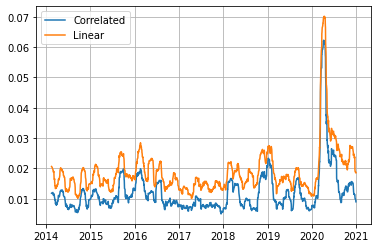

In [13]:
t = pd.Series(volwRollingCov, index = data.index[1:]) 
plt.plot(t.index, t.values, label = 'Correlated')
# plt.plot(vol)
plt.plot(portfolioVol, label = 'Linear')
plt.grid()
plt.legend()

In [14]:
# VaR Estimate, alpha = 5%

In [127]:
# Historical
print("Hist len:", len(portfolioReturn))
N = 10000
alpha = 0.05
pp = int(N*alpha)
historical = np.random.choice(portfolioReturn, N, replace=True)
historical.sort()
VaRHS = historical[pp]
print("Hist VaR {0:2.2f}%".format(100*VaRHS))

revise = [max(0, abs(var) - abs(VaRHS)) for var in historical]
CVaR = VaRHS - np.mean(revise)/(1-alpha)
print("Hist CVaR {0:2.2f}%".format(100*CVaR))

Hist len: 1762
Hist VaR -1.90%
Hist CVaR -2.04%


In [128]:
# Monte Carlo method
import scipy.stats as st
mu = np.mean(portfolioReturn)
sd = np.std(portfolioReturn)
sample = np.random.normal(mu, sd, N)
VaRMC = st.t.interval(alpha=1-alpha, df=len(sample)-1, loc=np.mean(sample), scale=np.std(sample)) 
print("MC VaR {0:2.2f}%".format(100*VaRMC[0]))

revise = [max(0, abs(s) - abs(VaRMC[0])) for s in sample]
CVaRMC= VaRMC[0] - np.mean(revise)/(1-alpha)
print("MC CVaR {0:2.2f}%".format(100*CVaRMC))

MC VaR -2.71%
MC CVaR -2.75%


In [129]:
# delta-normal method
VaRdelta = st.t.interval(alpha=0.95, df=len(portfolioReturn)-1, loc=np.mean(portfolioReturn), scale=np.std(portfolioReturn)) 
print("VaR {0:2.2f}%".format(100*VaRdelta[0]))

VaR -2.73%


3 VaR approach gives similiar results. From historical VaR, it showed that the returns may not be normal distribution.  

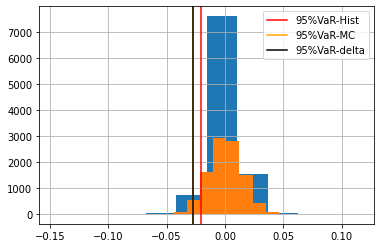

In [125]:
# plt.hist(portfolioReturn)
plt.hist(historical)
plt.hist(sample,stacked=True)
plt.vlines(VaRHS, ymin=min(portfolioReturn), ymax=max(portfolioReturn))
plt.axvline(x=VaRHS, color='red', label='95%VaR-Hist')
plt.axvline(x=VaRMC[0], color='orange', label='95%VaR-MC')
plt.axvline(x=VaRdelta[0], color='black', label='95%VaR-delta')
plt.grid()
plt.legend()
plt.show()


In [40]:
# Min-Variance Thm
# Sampling technique
Num = 100000
NumTicker = len(data.columns)
w = np.random.uniform(0, 1.0000001, (Num, NumTicker))

returns = data.apply(np.mean, axis=0)[:window]
reT = []
stD = []
for i in range(Num):
  weight = w[i]/sum(w[i])
  reT.append(100*np.sum(weight*returns))
  risk = np.matmul(np.matmul(weight,covMatrix), np.transpose(weight))
  stD.append(100*np.sqrt(risk))

# print(reT)
# print(stD)

Optimal:

Returns    0.096653
Vol        1.472455
Name: 3819, dtype: float64 

Min Vol:

Returns    0.044991
Vol        1.172734
Name: 30724, dtype: float64


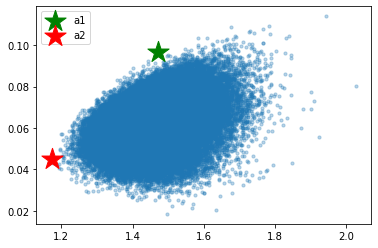

In [41]:
plt.scatter(stD, reT, marker='o', s=10, alpha=0.3)
rf = 0.001
portfolios = pd.DataFrame({"Returns": reT, "Vol": stD})
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Vol']).idxmax()]
min_vol_port = portfolios.iloc[portfolios['Vol'].idxmin()]
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500, label = 'a1')
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500, label = 'a2')
plt.legend()
print("Optimal:\n")
print(optimal_risky_port, '\n')
print("Min Vol:\n")
print(min_vol_port)

In [42]:
# portfolios.index[portfolios['Vol'] == min_vol_port['Vol']].tolist() 942th
# portfolios.index[portfolios['Vol'] == optimal_risky_port['Vol']].tolist() 467th
a1 = portfolios.index[portfolios['Vol'] == optimal_risky_port['Vol']].tolist()
a2 = portfolios.index[portfolios['Vol'] == min_vol_port['Vol']].tolist()
print(a1)
print(a2)

[3819]
[30724]


Optimal Return [[0.89838499 0.18262521 0.88836508 0.00845919 0.00934708 0.40897365
  0.0404779  0.75167301 0.47231847 0.28193841 0.07867611]]
Min VaR [[0.11176825 0.92067376 0.44373861 0.06838056 0.05535247 0.26741779
  0.09616218 0.85833176 0.06080866 0.19634375 0.94635824]]
Equal Weight [0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


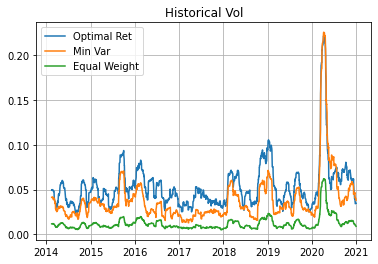

In [43]:
# recalculate with optimal weight
optimalReturnWeight = w[a1] # optimal return
Ids = rollingCov.index.unique(0)
optimaReturnCov= [np.matmul(np.matmul(optimalReturnWeight,rollingCov.loc[i].values), np.transpose(optimalReturnWeight)) 
                  for i in Ids
                 ]
optimaReturnCov = np.sqrt(optimaReturnCov).squeeze()
optimalReturnt = pd.Series(optimaReturnCov, index = data.index[1:]) 
plt.plot(optimalReturnt.index, optimalReturnt.values, label = 'Optimal Ret')


optimalWeight = w[a2] # min var
Ids = rollingCov.index.unique(0)
optimaCov= [np.matmul(np.matmul(optimalWeight,rollingCov.loc[i].values), np.transpose(optimalWeight)) 
                  for i in Ids
                 ]
optimaCov = np.sqrt(optimaCov).squeeze()
optimalt = pd.Series(optimaCov, index = data.index[1:]) 
plt.plot(optimalt.index, optimalt.values, label = 'Min Var')
# plt.plot(vol)
plt.plot(t.index, t.values, label = 'Equal Weight')
plt.grid()
plt.title("Historical Vol")
plt.legend()
print("Optimal Return", optimalReturnWeight)
print("Min VaR", optimalWeight)
print("Equal Weight", weights)


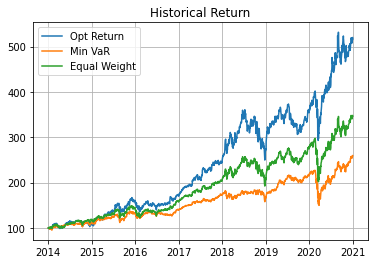

In [44]:
scale1 = 100/np.sum(optimalReturnWeight*ClosePrice, axis=1)[0]
scale2 = 100/np.sum(optimalWeight*ClosePrice, axis=1)[0]
scale3 = 100/np.sum(weights*ClosePrice, axis=1)[0]

plt.plot(np.sum(optimalReturnWeight*ClosePrice*scale1, axis=1), label = 'Opt Return')
plt.plot(np.sum(optimalWeight*ClosePrice*scale2, axis=1), label = 'Min VaR')
plt.plot(np.sum(weights*ClosePrice*scale3, axis=1), label = 'Equal Weight')
plt.title("Historical Return")
plt.legend()
plt.grid()
plt.show()

Summary:
The optimized weight are derived under first 30 days, a better strategy would be rebalancing every few months. One can see that at first min-var method has better performance in terms of portfolio vol and returns compared to equal weight and absolute return methods. 


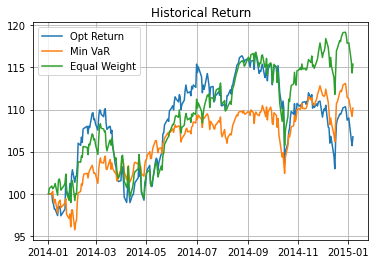

In [45]:
plt.plot(np.sum(optimalReturnWeight*ClosePrice*scale1, axis=1)[:256], label = 'Opt Return')
plt.plot(np.sum(optimalWeight*ClosePrice*scale2, axis=1)[:256], label = 'Min VaR')
plt.plot(np.sum(weights*ClosePrice*scale3, axis=1)[:256], label = 'Equal Weight')
plt.title("Historical Return")
plt.legend()
plt.grid()
plt.show()